## Module 3 Practise

### This is a Python Notebook

Following notebook will show basic plots using **ggplot**, **matplotlib**, and **seaborn** packages. 

The data used in the notebook is taken from [here (external link)](https://www.causeweb.org/cause/research/literature/sexual-activity-and-lifespan-male-fruitflies-dataset-gets-attention). 


## About the data set
From the readme file, a cost of increased reproduction in terms of reduced longevity has been shown for female fruitflies, but not for males.
The flies used were an outbred stock.
Sexual activity was manipulated by supplying individual males with one or eight receptive virgin females per day.  
The longevity of these males was compared with that of two control types.
The first control consisted of two sets of individual males kept with one or eight newly inseminated females.
Newly inseminated females will not usually remate for at least two days, and thus served as a control for any effect of competition with the male for food or space.

The second control was a set of individual males kept with no females. 
There were 25 males in each of the five groups, which were treated identically in number of anaesthetizations (using CO2) and provision of fresh food medium.

The dataset has 125 observations and 5 variables

In [1]:
import pandas as pd

fruitfly_data = pd.read_csv('../datasets/fruitfly/fruitfly.txt',sep=" ",\
                            names=["ID","Partners","Type","Longevity","Thorax","Sleep"])
fruitfly_data.head(5)

,ID,Partners,Type,Longevity,Thorax,Sleep
0,1,8,0,35,0.64,22
1,2,8,0,37,0.68,9
2,3,8,0,49,0.68,49
3,4,8,0,46,0.72,1
4,5,8,0,63,0.72,23


In [2]:
# Check the descriptive statistics for the dataset
fruitfly_data.describe()

,ID,Partners,Type,Longevity,Thorax,Sleep
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,13.000000,3.600000,2.200000,57.440000,0.820960,23.464000
std,7.240121,3.625626,3.443086,17.563893,0.077454,15.878848
min,1.000000,0.000000,0.000000,16.000000,0.640000,1.000000
25%,7.000000,1.000000,0.000000,46.000000,0.760000,13.000000
50%,13.000000,1.000000,1.000000,58.000000,0.840000,20.000000
75%,19.000000,8.000000,1.000000,70.000000,0.880000,29.000000
max,25.000000,8.000000,9.000000,97.000000,0.940000,83.000000


In [3]:
# Save the distribution of variable Partners in a variable called "counts"
counts = fruitfly_data.Partners.value_counts()
counts

Partners
8    50
1    50
0    25
Name: count, dtype: int64

In [4]:
# Create a dataframe "No_of_Partners" to make a bar graph for Partners variable
# No_of_Partners has two columns, 'Partners' to save no of partners and 'count' to store respective frequency count.
No_of_Partners = {'Partners' : [8, 1, 0], 'count' : counts}
No_of_Partners=pd.DataFrame(No_of_Partners)
No_of_Partners

,Partners,count
Partners,,
8,8,50
1,1,50
0,0,25


---

## Grammar of Graphics


In [5]:
#from ggplot import *
#import rpy2
# Warnings expected

## ggplot is deprecated in python,. Has not been updated in 2016
import plotnine

from plotnine import ggplot, aes, geom_bar



In [6]:
# Create a bar chart for Partners variable using ggplot package.
# ggplot(aes(x="Partners", weight="count"), No_of_Partners) + geom_bar()
ggplot(aes(x="Partners", weight="count"), No_of_Partners) + geom_bar()
plot = ggplot(No_of_Partners, aes(x='Partners', weight='count')) + geom_bar()

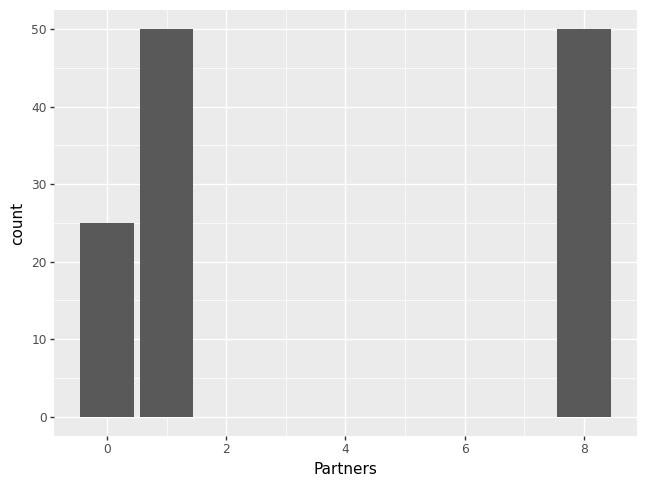

In [7]:
plot.draw()

In [8]:
type(fruitfly_data.Partners)

pandas.core.series.Series

Convert the type of Partners from integer to Object so that it can be used to color the data points. 

In [9]:
fruitfly_data['Partners']=fruitfly_data['Partners'].astype(object)
type(fruitfly_data.Partners)

pandas.core.series.Series

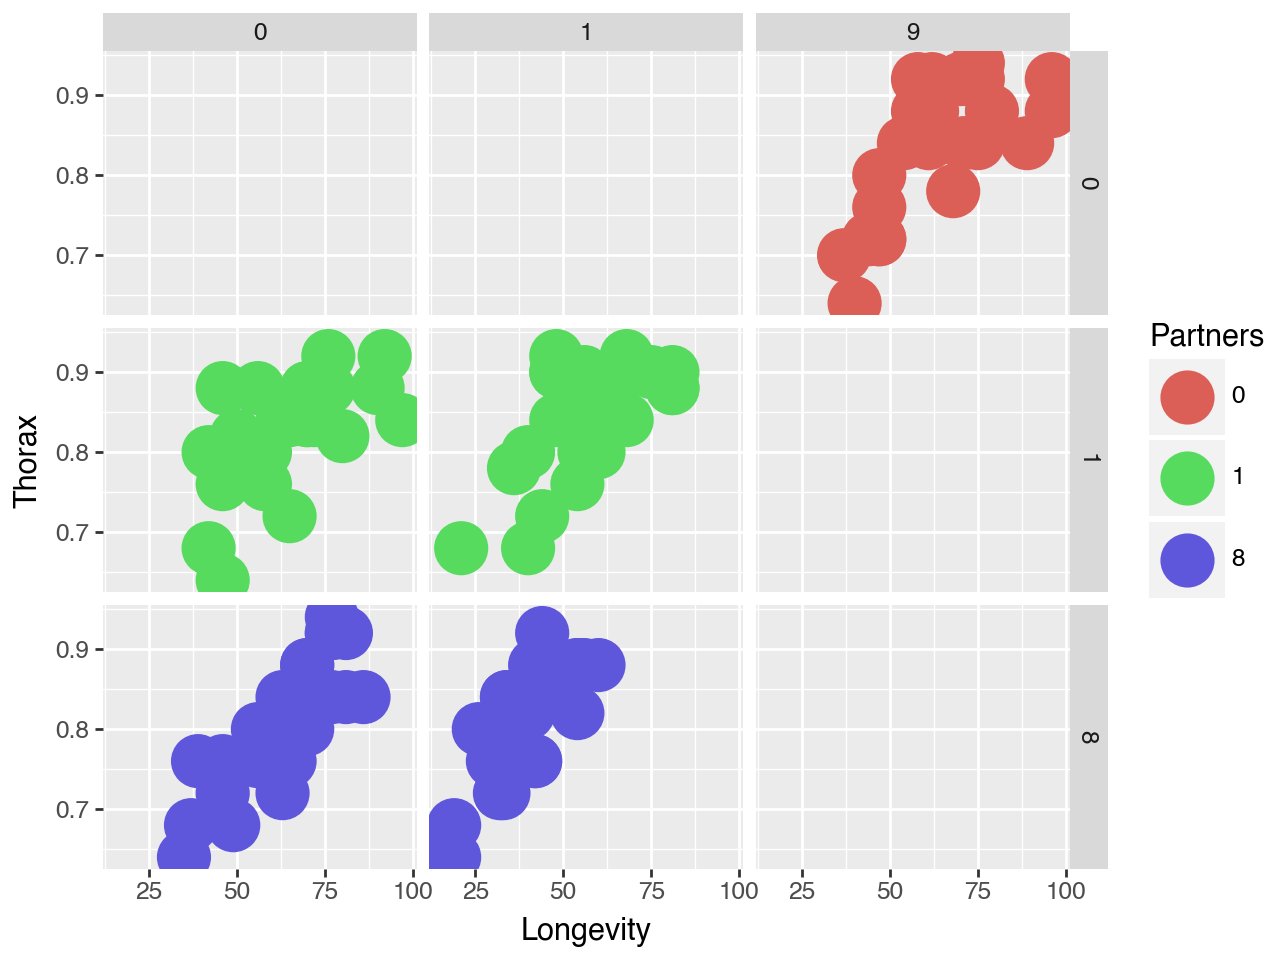

In [10]:
from plotnine import ggplot, aes, geom_point, facet_grid

# Assuming fruitfly_data is your DataFrame
p = ggplot(fruitfly_data, aes(x='Longevity', y='Thorax', color='Partners')) 
p = p + geom_point(size=10) + facet_grid('Partners ~ Type')

# To display the plot
#print(p)
p.show()

## Matplot Lib

Matplot Lib is the default plotting library of python.
The code below uses matplotlib package to draw a histogram. 
As you know from statistics, this is a type of bar-chart,where the bars are frequencies.

Text(0.5, 1.0, 'Histogram of Longevity')

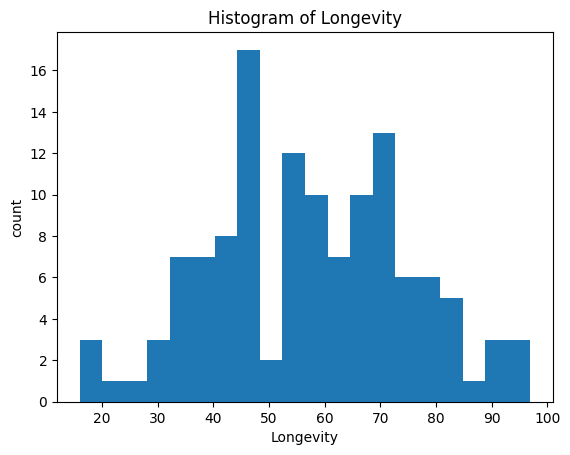

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Histogram for Longevity variable with 20 bins
plt.hist(fruitfly_data.Longevity, bins=20)
plt.xlabel('Longevity')
plt.ylabel('count')
plt.title('Histogram of Longevity')

## Seaborn

##### From the documentation

Seaborn is a library for making attractive and informative statistical graphics in Python. 
It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Some of the features that seaborn offers are:
  * Several built-in themes that improve on the default matplotlib aesthetics
  * Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
  * Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
  * Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
  * Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
  * A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
  * High-level abstractions for structuring grids of plots that let you easily build complex visualizations

...

Seaborn should be thought of as a complement to matplotlib, not a replacement for it. 
When using seaborn, it is likely that you will often invoke matplotlib functions directly to draw simpler plots already available through the pyplot namespace. 
Further, while the seaborn functions aim to make plots that are reasonably “production ready” (including extracting semantic information from Pandas objects to add informative labels), full customization of the figures will require a sophisticated understanding of matplotlib objects.

https://seaborn.pydata.org/introduction.html

  * [Local Mirror](https://indigo.sgn.missouri.edu/static/mirror_sites/seaborn.pydata.org/introduction.html)


### Faceted Exploration

Faceted exploration will _automagically_ lay out mutliple plots allowing the comparison of difference combinations of factors on the data set.

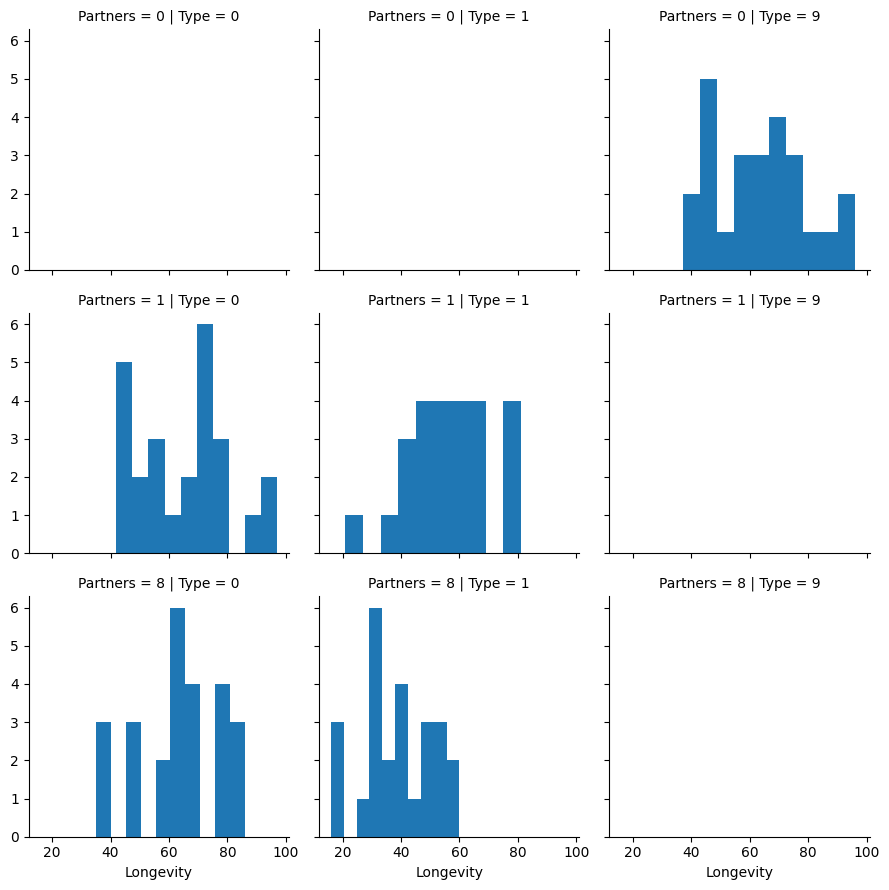

In [12]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

g = sns.FacetGrid(fruitfly_data, row="Partners", col="Type")
g.map(plt.hist, "Longevity")

The facets work with other plots types as well.

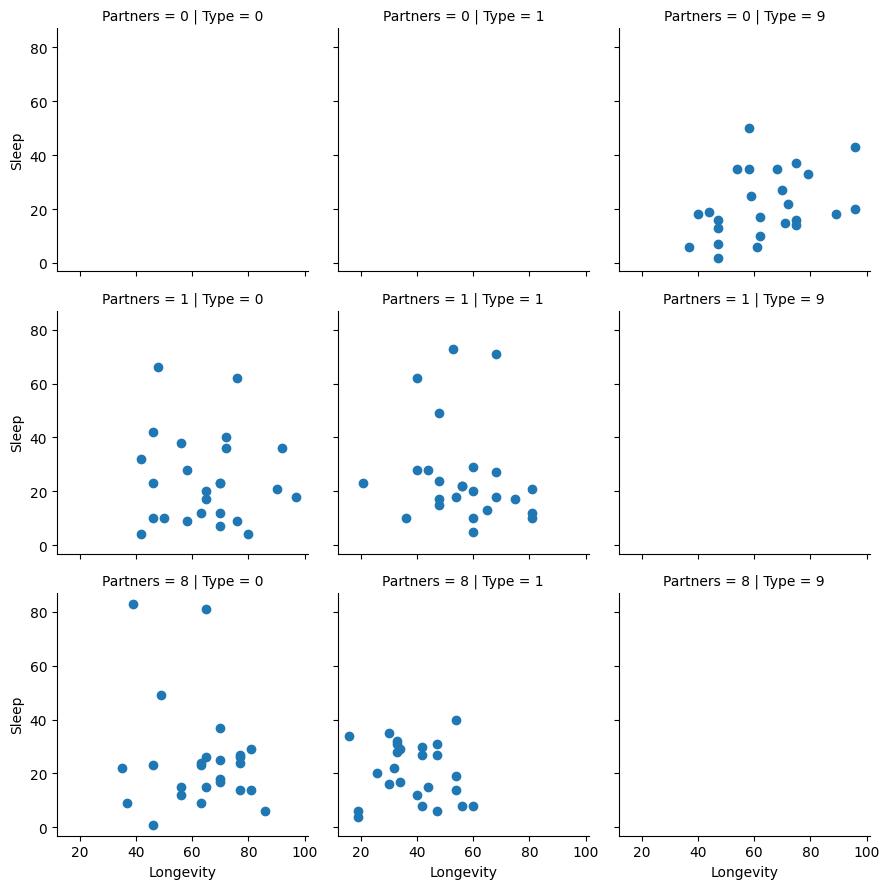

In [13]:

g = sns.FacetGrid(fruitfly_data, row="Partners", col="Type")
g.map(plt.scatter, "Longevity", "Sleep")

## Bar charts

Bar charts uses horizontal or vertical bars to show comparisons among categories. 

One axis of the chart shows the categories being compared, and the other axis represents a quantitative value. 


<Axes: xlabel='Partners', ylabel='count'>

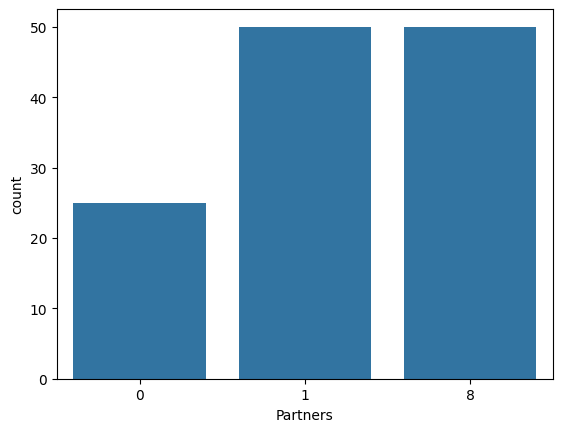

In [14]:
# Using the No_of_Partners datafrom compute above
sns.barplot(x="Partners", y="count",data=No_of_Partners)

## Box and Whisker Plots

Box plot is a convenient way of graphically depicting common descriptive statistics of data, divided into categories. Box plots may also have lines extending vertically from the boxes (**whiskers**) indicating variability outside the upper and lower quartiles, hence the terms box and whisker plot.

![Boxplot_vs_PDF](../images/Boxplot_vs_PDF.png)
###### from: By Jhguch at en.wikipedia, CC BY-SA 2.5, https://commons.wikimedia.org/w/index.php?curid=14524285


<Axes: xlabel='Type', ylabel='Longevity'>

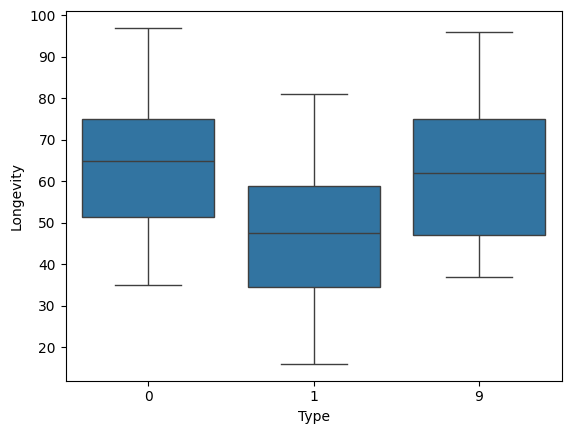

In [19]:
# Draw a nested boxplot to show 
sns.boxplot(x="Type", y="Longevity", data=fruitfly_data) #, palette="PRGn")

<Axes: xlabel='Partners', ylabel='Longevity'>

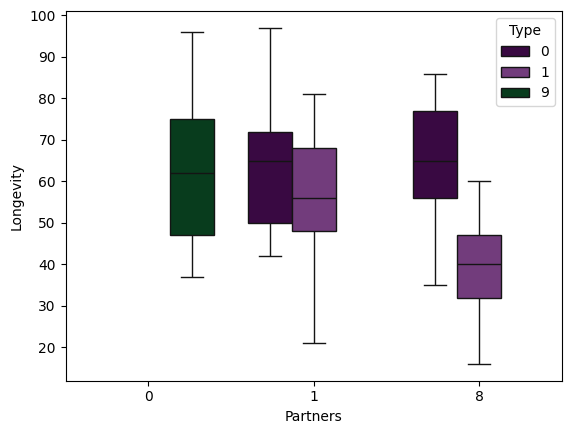

In [20]:
# Draw a nested boxplot to show 
sns.boxplot(x="Partners", y="Longevity",hue="Type",  data=fruitfly_data, palette="PRGn")

**Notice**, buy adding the hue parameter as a new visual variable, the plot groups the defined variable as subsets of partners.

Below, we will turn the box and whiskers sideways.

<Axes: xlabel='Longevity', ylabel='Partners'>

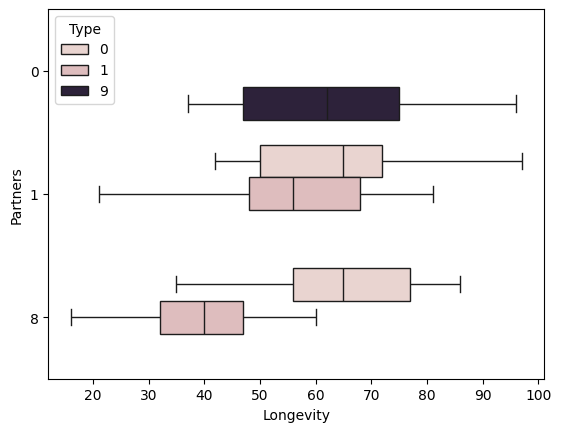

In [21]:
# Draw a nested boxplot to show 
sns.boxplot(x="Longevity",y="Partners",hue="Type", orient="h",  data=fruitfly_data) #, palette="PRGn")